Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn.
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
- Demographic info about customers – gender, age range, and if they have partners and dependents

# 1.) Import and Explore the Data

In [1]:
import pandas as pd
import numpy as np

churn_df = pd.read_csv("Telco-Customer-Churn.csv")
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
churn_df.isnull().sum()

# Good, we don't need to worry null value since there is none.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 2.) Transform and Clean the Data

In [3]:
# Since the tenure is not classified yet so we need to classified it first
churn_df['tenure'].unique()

churn_df['Range Tenure'] = np.nan
churn_df.loc[(churn_df['tenure']>= 0) & (churn_df['tenure']<= 6), ['Range Tenure']] = '0-6 Month'
churn_df.loc[(churn_df['tenure']> 6) & (churn_df['tenure']<= 12), ['Range Tenure']] = '7-12 Month'
churn_df.loc[(churn_df['tenure']> 12) & (churn_df['tenure']<= 24), ['Range Tenure']] = '13-24 Month'
churn_df.loc[(churn_df['tenure']> 24) & (churn_df['tenure']<= 36), ['Range Tenure']] = '25-36 Month'
churn_df.loc[(churn_df['tenure']> 36) & (churn_df['tenure']<= 48), ['Range Tenure']] = '37-48 Month'
churn_df.loc[(churn_df['tenure']> 48) & (churn_df['tenure']<= 62), ['Range Tenure']] = '49-62 Month'
churn_df.loc[(churn_df['tenure']> 62), ['Range Tenure']] = '>62 Month'


In [4]:
# Reorder the column by change to list and to dataframe again
churn_df.columns.to_list()

cols = ['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'Range Tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

churn_df = churn_df[cols]
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Range Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0-6 Month,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,25-36 Month,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,0-6 Month,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,37-48 Month,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,0-6 Month,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Since there are alot of inputs from the customer data, for this project I would like to use type of subscription
- MultipleLines,
- InternetService,
- OnlineSecurity,
- OnlineBackup,
- DeviceProtection,
- TechSupport,
- StreamingTV and
- Contract Duration (Tenure Range).


__Let's remove the unrelavant columns__

In [5]:
#We keep costumer ID due to primary key
churn_df.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'Contract', 
                       'PaperlessBilling','PaymentMethod', 'MonthlyCharges','TotalCharges'], inplace=True)
churn_df.head()

,customerID,Range Tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,7590-VHVEG,0-6 Month,No phone service,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,25-36 Month,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,0-6 Month,No,DSL,Yes,Yes,No,No,No,No,Yes
3,7795-CFOCW,37-48 Month,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,0-6 Month,No,Fiber optic,No,No,No,No,No,No,Yes


In [6]:
for i in range(2,len(churn_df.columns)):
    a = churn_df.columns[i]
    print(f" {a} = {churn_df[a].unique()}")
    

 MultipleLines = ['No phone service' 'No' 'Yes']
 InternetService = ['DSL' 'Fiber optic' 'No']
 OnlineSecurity = ['No' 'Yes' 'No internet service']
 OnlineBackup = ['Yes' 'No' 'No internet service']
 DeviceProtection = ['No' 'Yes' 'No internet service']
 TechSupport = ['No' 'Yes' 'No internet service']
 StreamingTV = ['No' 'Yes' 'No internet service']
 StreamingMovies = ['No' 'Yes' 'No internet service']
 Churn = ['No' 'Yes']


As we can see the values mostly can be said have __'Duplicate'__ since *'No'* and *'No internet service'* are both has similar meaning

So I will normalize it by __'replace'__ everything contain 'No' into single 'No' 

In [7]:
churn_df['MultipleLines'].replace(['No phone service'], 'No', inplace = True)
churn_df['OnlineSecurity'].replace(['No internet service'], 'No', inplace = True)
churn_df['OnlineBackup'].replace(['No internet service'], 'No', inplace = True)
churn_df['DeviceProtection'].replace(['No internet service'], 'No', inplace = True)
churn_df['TechSupport'].replace(['No internet service'], 'No', inplace = True)
churn_df['StreamingTV'].replace(['No internet service'], 'No', inplace = True)
churn_df['StreamingMovies'].replace(['No internet service'], 'No', inplace = True)

churn_df.head()

,customerID,Range Tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,7590-VHVEG,0-6 Month,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,25-36 Month,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,0-6 Month,No,DSL,Yes,Yes,No,No,No,No,Yes
3,7795-CFOCW,37-48 Month,No,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,0-6 Month,No,Fiber optic,No,No,No,No,No,No,Yes


# 3.) Determine the Response and explanatory Variable

we need to label each of the column input (X) using **LabelEncoder()**

In [8]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
RangeTenure = label.fit_transform(churn_df['Range Tenure'])
MultipleLines = label.fit_transform(churn_df['MultipleLines'])
InternetService = label.fit_transform(churn_df['InternetService'])
OnlineSecurity = label.fit_transform(churn_df['OnlineSecurity'])
OnlineBackup = label.fit_transform(churn_df['OnlineBackup'])
DeviceProtection = label.fit_transform(churn_df['DeviceProtection'])
TechSupport = label.fit_transform(churn_df['TechSupport'])
StreamingTV = label.fit_transform(churn_df['StreamingTV'])
StreamingMovies = label.fit_transform(churn_df['StreamingMovies'])

# Convert datafram to list/tuple
X = churn_df[['Range Tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].values

#Create Input
X[:,0] = RangeTenure
X[:,1] = MultipleLines
X[:,2] = InternetService
X[:,3] = OnlineSecurity
X[:,4] = OnlineBackup
X[:,5] = DeviceProtection
X[:,6] = TechSupport
X[:,7] = StreamingTV
X[:,8] = StreamingMovies

X[0:5]

array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [2, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0],
       [3, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=object)

In [9]:
# Create Output
y = churn_df['Churn']
y[0:5]

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

## 4.) KNN Classifier Model

In [10]:
def sumOfDiagonal(matrix):
    sum = 0
    for i in range(len(matrix)):
        sum += matrix[i][i]        
    return sum

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

score_df = pd.DataFrame()
std_arr = []

for n_state in range(1,4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = n_state)

    store_acc = np.zeros((10))
    std_acc = np.zeros((10))
    tot_cfm = []

    for n in range(1,11):
        model = KNeighborsClassifier(n_neighbors = n)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        store_acc[n-1] = accuracy_score(y_test, y_pred)
        std_acc = np.std(y_pred==y_test)/np.sqrt(len(y_pred))
        cfm = confusion_matrix(y_test, y_pred)
        corr_pred = sumOfDiagonal(cfm)
        tot_cfm.append(corr_pred)
    store_acc
    
    score_df[n_state-1] = store_acc
    std_arr.append(std_acc) 

__Plot the Accuracy and the standard error as the shadow__

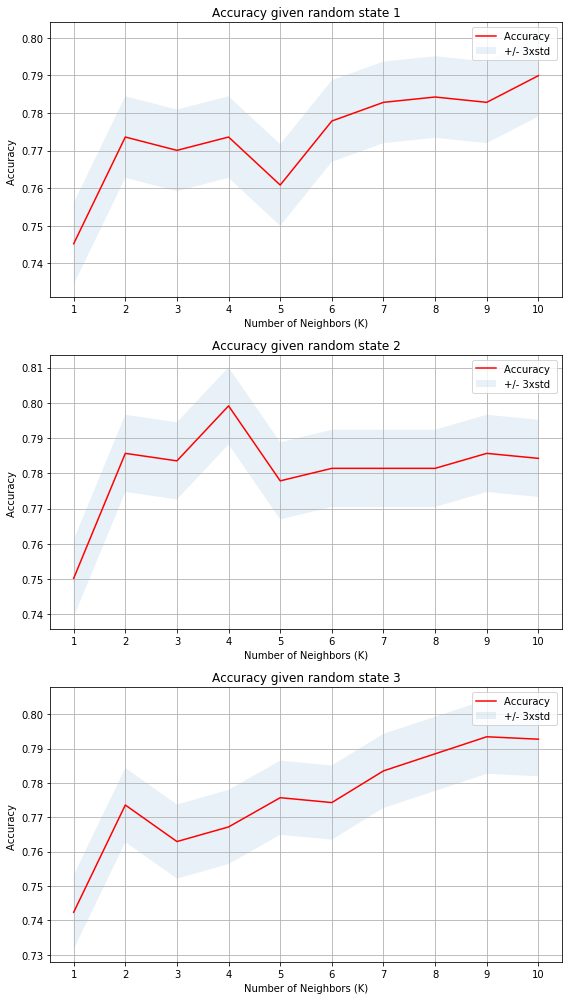

In [16]:
import matplotlib.pyplot as plt
nl = '\n'
fig, ax = plt.subplots(3,1, figsize=(8, 14), edgecolor='k')
for i in range(0,3):
    ax[i].plot(range(1,11),score_df[i],'r')
    ax[i].fill_between(range(1,11),score_df[i] - 1 * std_arr[i] ,score_df[i] + 1 * std_arr[i], alpha=0.10)
    ax[i].xaxis.set_ticks(np.arange(1,11,1))
    ax[i].set_title(f'Accuracy given random state {i+1}')
    ax[i].legend(('Accuracy ', '+/- 3xstd'))
    ax[i].set_ylabel('Accuracy ')
    ax[i].set_xlabel('Number of Neighbors (K)')
    fig.tight_layout()
    ax[i].grid()
plt.show()



In [13]:
final = pd.DataFrame()
final['K_neighbors'] = range(1,11)
final['Accuracy n = 1'] = np.round(score_df[0],3)
final['Accuracy n = 2'] = np.round(score_df[1],3)
final['Accuracy n = 3'] = np.round(score_df[2],3)
final.set_index('K_neighbors', inplace=True)
final

,Accuracy n = 1,Accuracy n = 2,Accuracy n = 3
K_neighbors,,,
1,0.745,0.750,0.742
2,0.774,0.786,0.774
3,0.770,0.784,0.763
4,0.774,0.799,0.767
5,0.761,0.778,0.776
6,0.778,0.781,0.774
7,0.783,0.781,0.784
8,0.784,0.781,0.789
9,0.783,0.786,0.793


In [14]:
for i in range(0,3):
    col = final.columns[0:3].to_list()
    k = final[col[i]].argmax()
    winner = np.max(final[col[i]])
    print(f"The highest accuracy for n = {i+1} is {winner} which has {k} Neighbors")

The highest accuracy for n = 1 is 0.79 which has 10 Neighbors
The highest accuracy for n = 2 is 0.799 which has 4 Neighbors
The highest accuracy for n = 3 is 0.793 which has 9 Neighbors


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


- For random state 1, the highest accuracy is 0.79 with 10 Neighbors. (Last model)
- For random state 2, the highest accuracy is 0.799 with 4 Neighbors. (Best model)
- For random state 3, the highest accuracy is 0.793 with 10 Neighbors. (Second Best model)

- As we can see KNN Classifier with **random state = 2, with k (neighbors) = 4** has **the highest accuracy = 0.799**
- Therfore we choose this as our optimize KNN classifier model.